# Word representation

📌 text representation refers to the process of converting `raw text` into a `numerical format` that machine learning models can understand and work with.

📌 Each method offers a different perspective on how to capture the essence of text and pave the way for powerful nlp applications.

### One-Hot Encoding


📌 creates new columns for each category where 1 means the category is present and 0 means it is not.

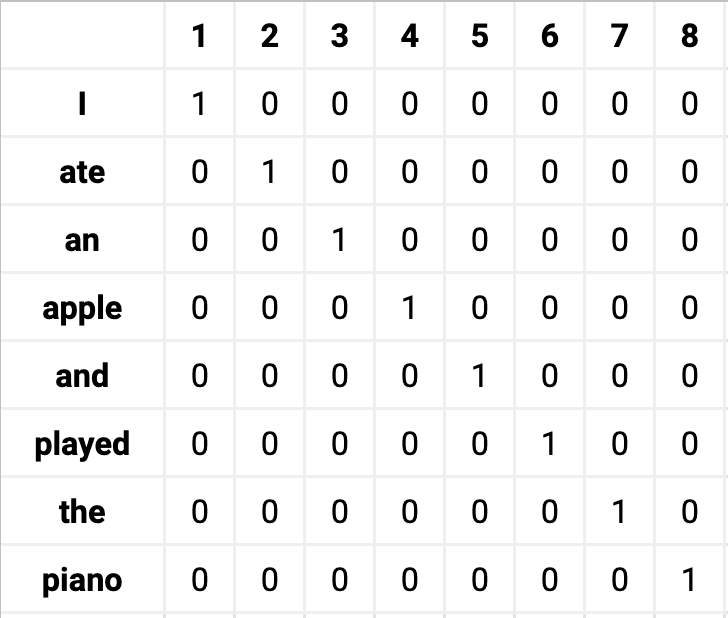

In [1]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

Categorical data to be converted to numeric data

In [2]:
colors = (["red", "green", "yellow", "red", "blue"])

integer mapping using LabelEncoder

In [3]:
label_encoder = LabelEncoder()

In [4]:
integer_encoded = label_encoder.fit_transform(colors)
integer_encoded

array([2, 1, 3, 2, 0], dtype=int64)

In [5]:
len(integer_encoded)

5

In [6]:
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1) # We changed the dim of the array from 1-d to 2-d because OneHotEncoder expect a 2-d array from us as and input
integer_encoded

array([[2],
       [1],
       [3],
       [2],
       [0]], dtype=int64)

One hot encoding

In [7]:
onehot_encoder = OneHotEncoder(sparse_output=False)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
onehot_encoded

array([[0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.]])

### Bag of Words

📌 A bag of words is a representation of text that describes the occurrence of words within a document

📌 it ignores the order and structure of words in the document

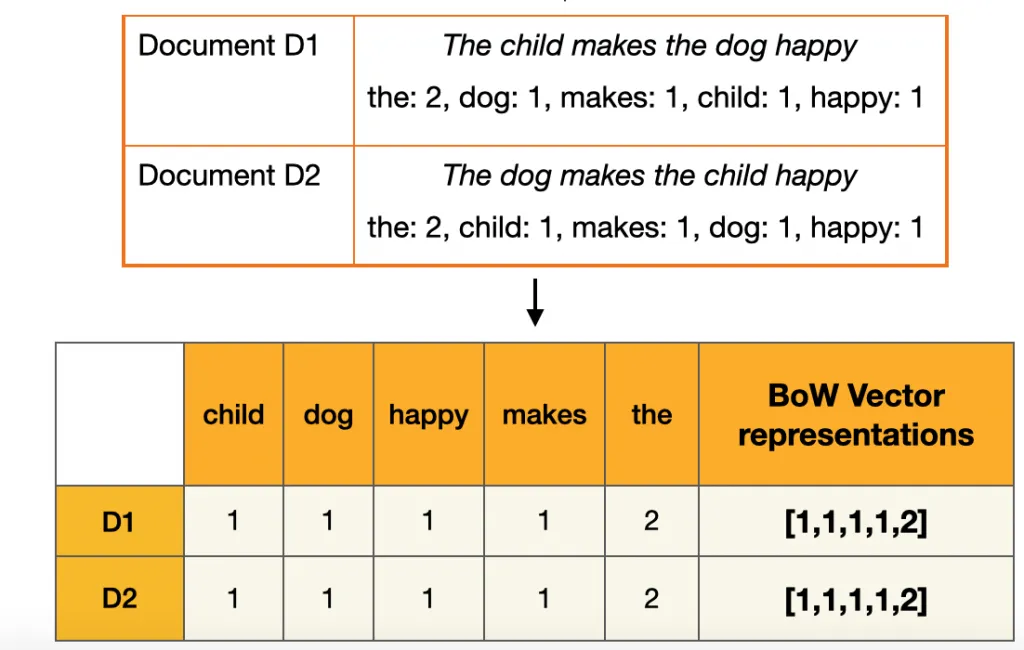

In [8]:
import nltk

In [9]:
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\moham\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\moham\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [10]:
input_list = ["Joe waited for the train", "The train was late", "Mary and Samantha took the bus", "I looked for Mary and Samantha at the bus station","Mary and Samantha arrived at the bus station early but waited until noon for the bus"]

In [11]:
from nltk.tokenize import word_tokenize

In [12]:
tokens = []

for i in range(len(input_list)):
    tokens +=(word_tokenize(input_list[i]))
    
tokens

['Joe',
 'waited',
 'for',
 'the',
 'train',
 'The',
 'train',
 'was',
 'late',
 'Mary',
 'and',
 'Samantha',
 'took',
 'the',
 'bus',
 'I',
 'looked',
 'for',
 'Mary',
 'and',
 'Samantha',
 'at',
 'the',
 'bus',
 'station',
 'Mary',
 'and',
 'Samantha',
 'arrived',
 'at',
 'the',
 'bus',
 'station',
 'early',
 'but',
 'waited',
 'until',
 'noon',
 'for',
 'the',
 'bus']

In [13]:
from nltk.corpus import stopwords

In [14]:
stop_words = set(stopwords.words('english'))

In [15]:
clean_tokens = []

for w in tokens:
    if w.lower() not in stop_words:
        clean_tokens.append(w)

clean_tokens

['Joe',
 'waited',
 'train',
 'train',
 'late',
 'Mary',
 'Samantha',
 'took',
 'bus',
 'looked',
 'Mary',
 'Samantha',
 'bus',
 'station',
 'Mary',
 'Samantha',
 'arrived',
 'bus',
 'station',
 'early',
 'waited',
 'noon',
 'bus']

In [16]:
import numpy as np

In [17]:
for sentence in input_list:
    words = word_tokenize(sentence)
    bag_vector = np.zeros(len(clean_tokens))
    
    for w in words:
        for i,word in enumerate(clean_tokens):
            if word == w:
                bag_vector[i] += 1

    print("{0}\n{1}\n".format(sentence,np.array(bag_vector)))

Joe waited for the train
[1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]

The train was late
[0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

Mary and Samantha took the bus
[0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1.]

I looked for Mary and Samantha at the bus station
[0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 1.]

Mary and Samantha arrived at the bus station early but waited until noon for the bus
[0. 1. 0. 0. 0. 1. 1. 0. 2. 0. 1. 1. 2. 1. 1. 1. 1. 2. 1. 1. 1. 1. 2.]

